In [69]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Specify the path to the CSV file in your Google Drive
file_path = '/content/gdrive/My Drive/boston/HousingData.csv'

# Load the dataset from the CSV file
boston = pd.read_csv(file_path)

# Display basic information about the dataset
print(boston.info())

# Summary statistics
print(boston.describe())




Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000 

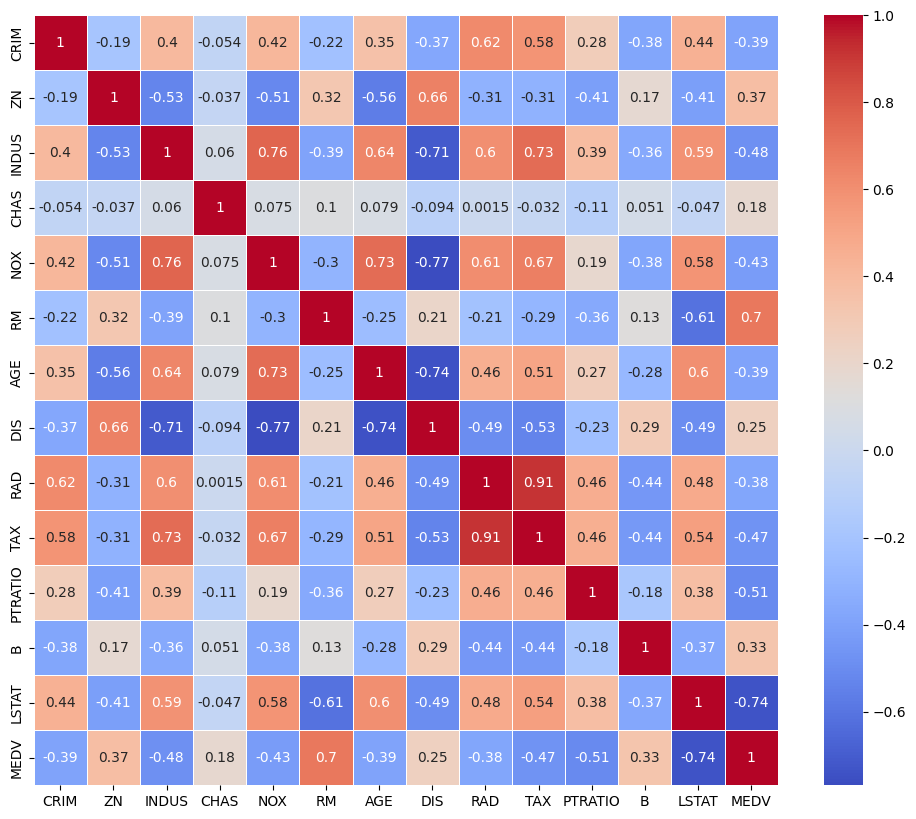

In [70]:
# Correlation matrix
correlation_matrix = boston.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()



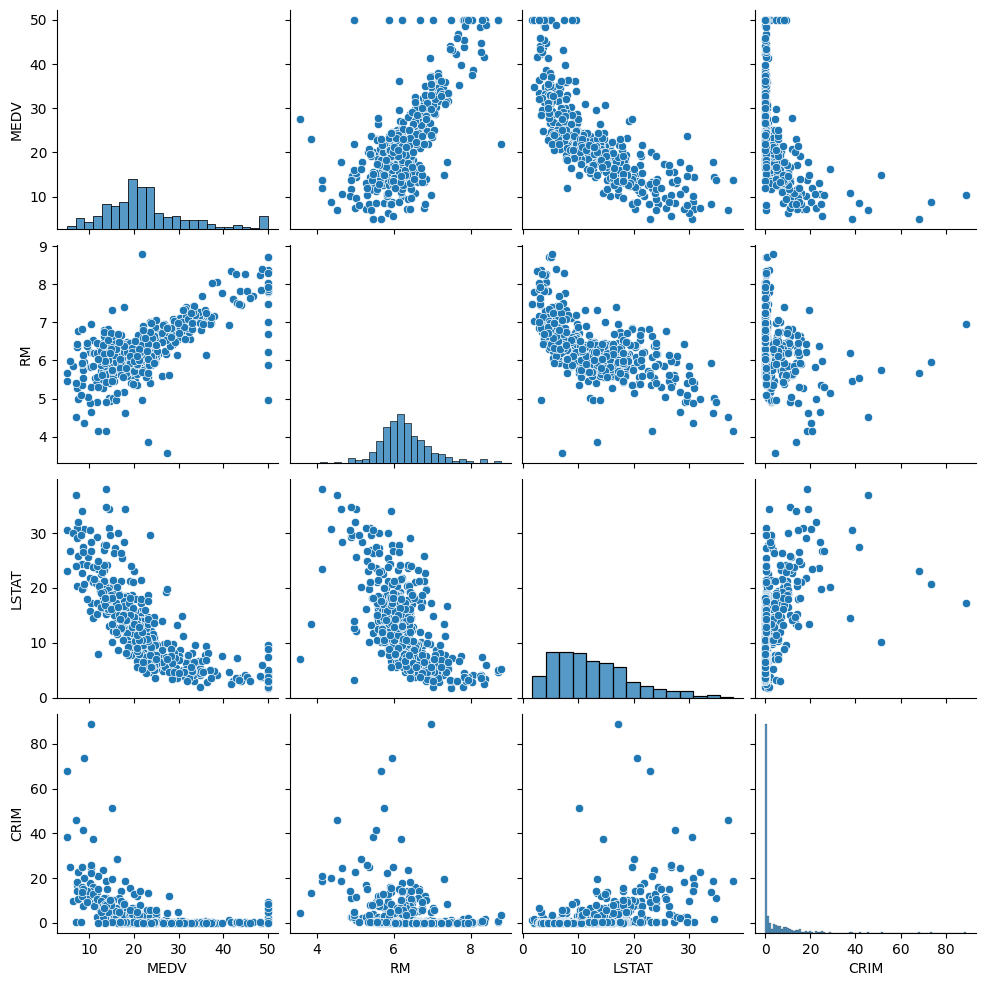

In [71]:
# Pairplot for selected features
sns.pairplot(boston[['MEDV', 'RM', 'LSTAT', 'CRIM']])
plt.show()



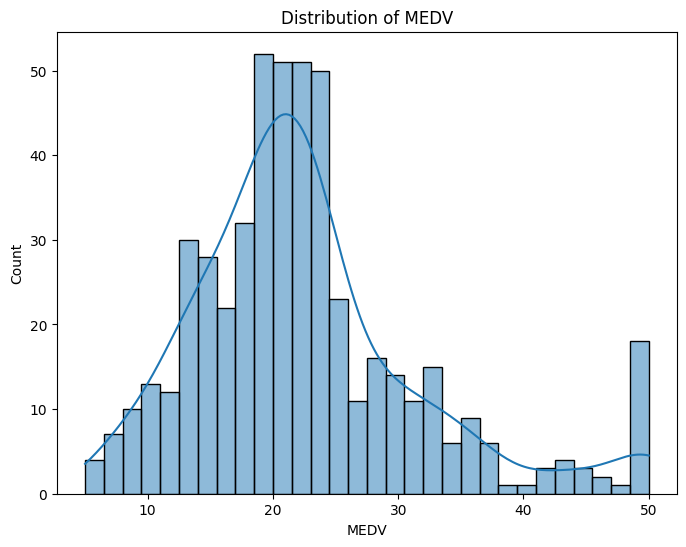

In [34]:
# Histogram of the target variable (MEDV)
plt.figure(figsize=(8, 6))
sns.histplot(boston['MEDV'], bins=30, kde=True)
plt.title('Distribution of MEDV')
plt.show()

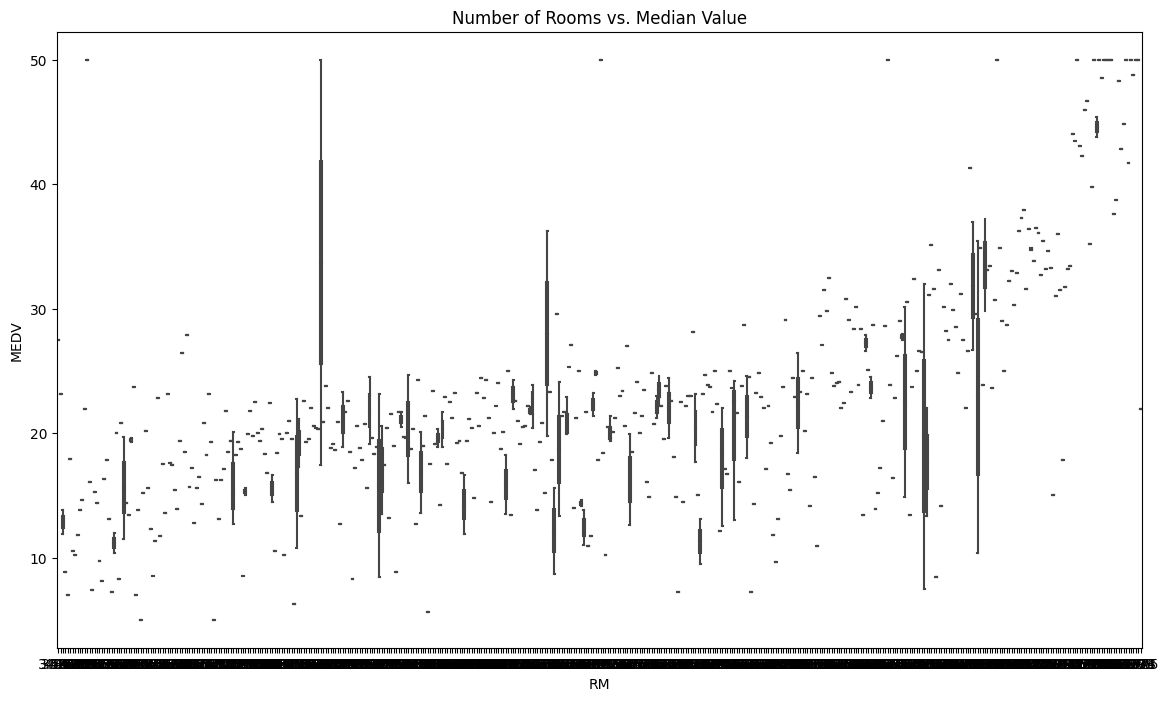

In [35]:
# Boxplot for selected features
plt.figure(figsize=(14, 8))
sns.boxplot(x='RM', y='MEDV', data=boston)
plt.title('Number of Rooms vs. Median Value')
plt.show()

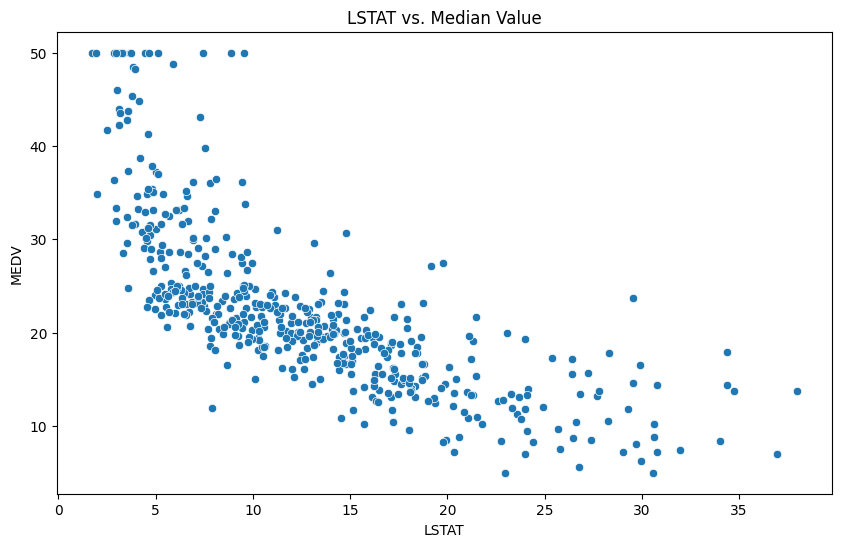

In [36]:
# Scatter plot for LSTAT vs. MEDV
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LSTAT', y='MEDV', data=boston)
plt.title('LSTAT vs. Median Value')
plt.show()

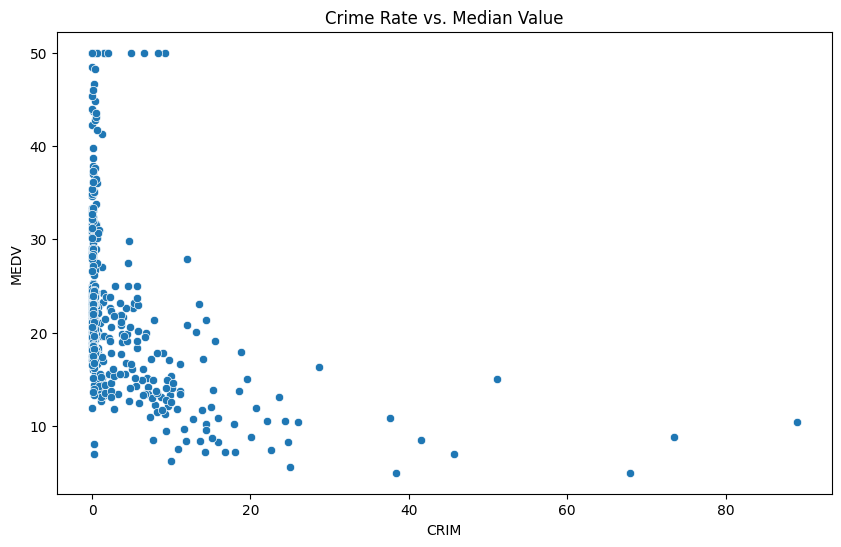

In [37]:
# Scatter plot for CRIM vs. MEDV
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CRIM', y='MEDV', data=boston)
plt.title('Crime Rate vs. Median Value')
plt.show()

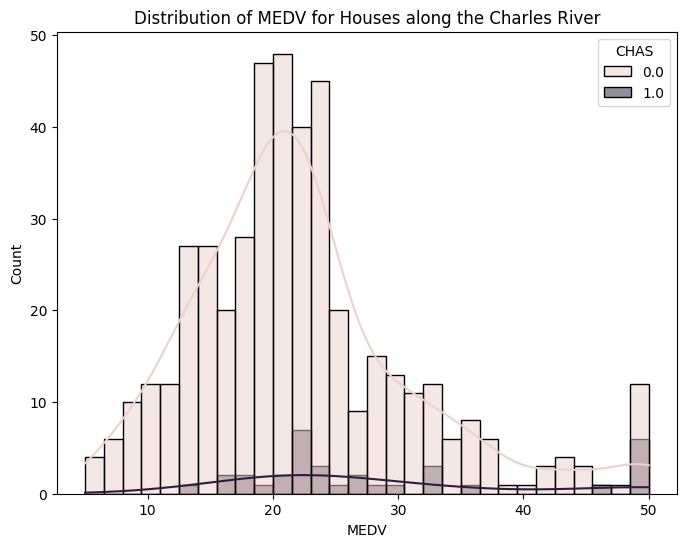

In [38]:
# Distribution of the target variable for houses along the Charles River
plt.figure(figsize=(8, 6))
sns.histplot(x='MEDV', data=boston, hue='CHAS', bins=30, kde=True)
plt.title('Distribution of MEDV for Houses along the Charles River')
plt.show()

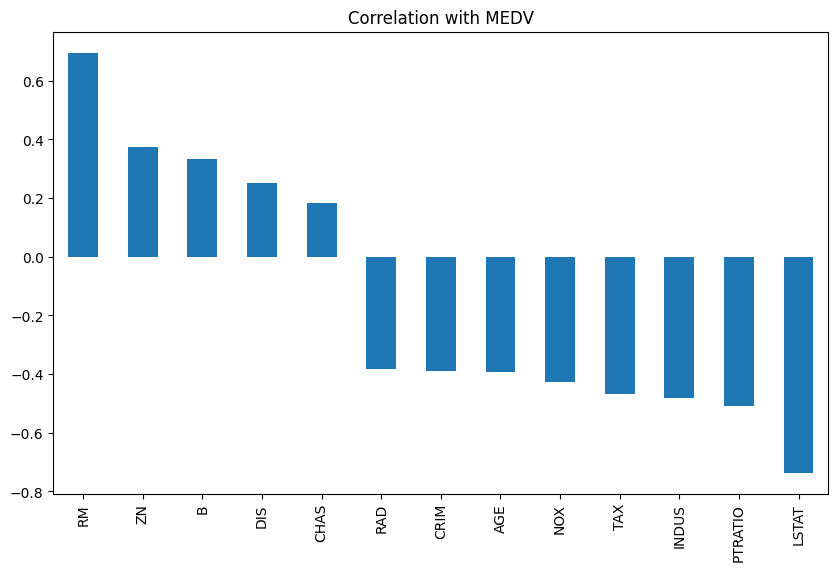

In [39]:
# Correlation between features and target variable
correlations_with_target = boston.corr()['MEDV'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
correlations_with_target.drop('MEDV').plot(kind='bar')
plt.title('Correlation with MEDV')
plt.show()

In [40]:
# Check for null values in the dataset. . . . . . .
null_values = boston.isnull().sum()

# Display columns with null values. . . . .
columns_with_null = null_values[null_values > 0]
if not columns_with_null.empty:
    print("Columns with null values:")
    print(columns_with_null)
else:
    print("No null values in the dataset.")


Columns with null values:
CRIM     20
ZN       20
INDUS    20
CHAS     20
AGE      20
LSTAT    20
dtype: int64


In [50]:
# Check for null values in the dataset
null_values = boston.isnull().sum()

# Display columns with null values, if any
columns_with_null = null_values[null_values > 0]
if not columns_with_null.empty:
    print("Columns with null values:")
    print(columns_with_null)

    # Choose either removal or imputation
    # Option 1: Remove rows with null values
    # boston_cleaned = boston.dropna()

    # Option 2: Impute null values with the median
    boston_imputed = boston.fillna(boston.median())

    # Display the number of rows before and after cleaning/imputation
    print(f"Number of rows before cleaning: {boston.shape[0]}")
    print(f"Number of rows after cleaning: {boston_imputed.shape[0]}")
else:
    print("No null values in the dataset.")


Columns with null values:
CRIM     20
ZN       20
INDUS    20
CHAS     20
AGE      20
LSTAT    20
dtype: int64
Number of rows before cleaning: 506
Number of rows after cleaning: 506


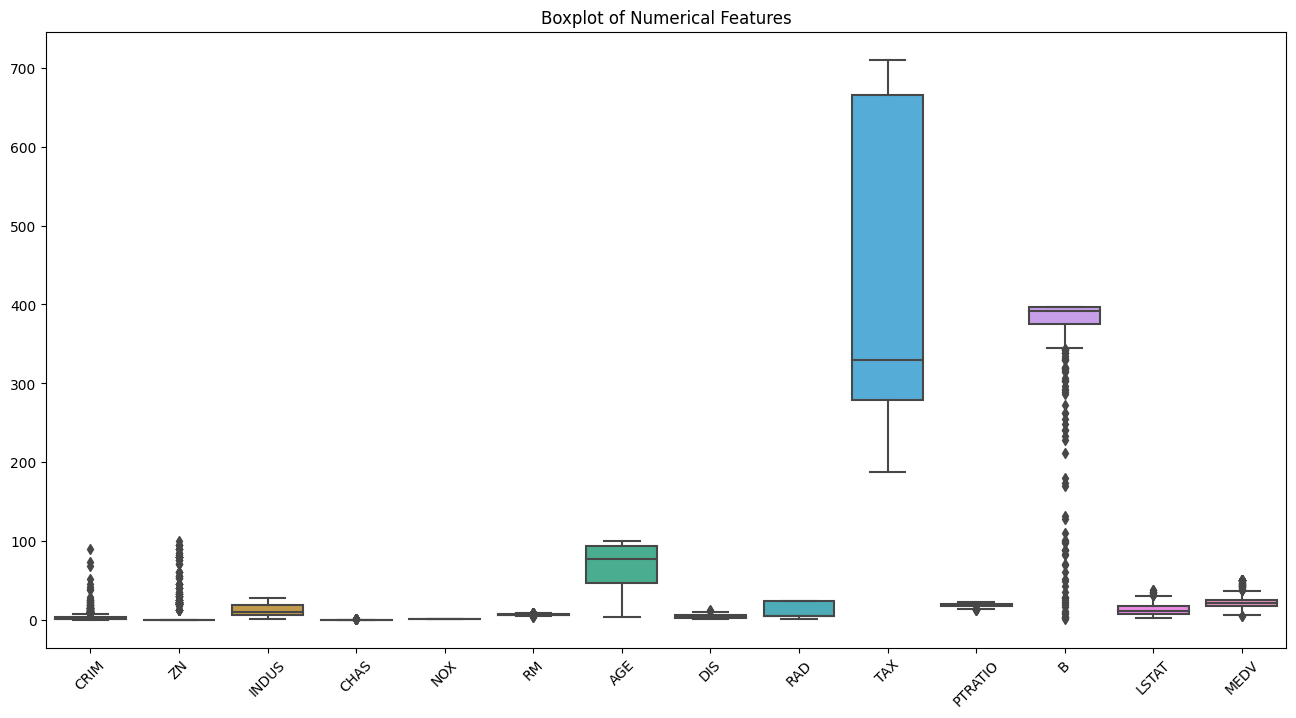

Rows with outliers:
         CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
356   8.98296  0.0   18.1   1.0  0.770  6.212   97.4  2.1222   24  666   
367  13.52220  0.0   18.1   0.0  0.631  3.863  100.0  1.5106   24  666   
371   9.23230  0.0   18.1   0.0  0.631  6.216  100.0  1.1691   24  666   
372   8.26725  0.0   18.1   1.0  0.668  5.875   89.6  1.1296   24  666   
373  11.10810  0.0   18.1   0.0  0.668  4.906  100.0  1.1742   24  666   
..        ...  ...    ...   ...    ...    ...    ...     ...  ...  ...   
370   6.53876  0.0   18.1   1.0  0.631  7.016   97.5  1.2024   24  666   
371   9.23230  0.0   18.1   0.0  0.631  6.216  100.0  1.1691   24  666   
372   8.26725  0.0   18.1   1.0  0.668  5.875   89.6  1.1296   24  666   
398  38.35180  0.0   18.1   0.0  0.693  5.453  100.0  1.4896   24  666   
405  67.92080  0.0   18.1   0.0  0.693  5.683  100.0  1.4254   24  666   

     PTRATIO       B  LSTAT  MEDV  
356     20.2  377.73  17.60  17.8  
367     20.2  131.4

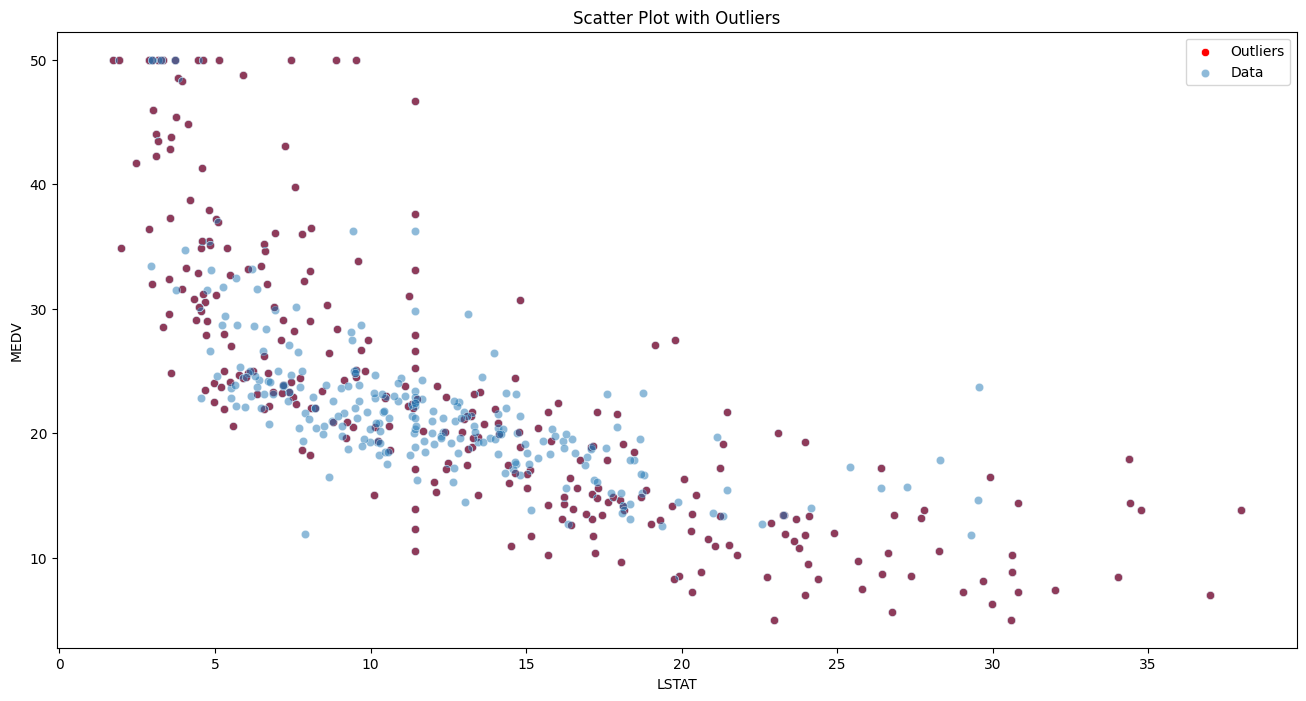

In [51]:


# Select numerical features for outlier detection
numerical_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Create a boxplot to visualize outliers
plt.figure(figsize=(16, 8))
sns.boxplot(data=boston_imputed[numerical_features])
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

# Function to detect outliers using IQR method
def detect_outliers(df, features):
    outliers = pd.DataFrame()

    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        feature_outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        outliers = pd.concat([outliers, feature_outliers])

    return outliers

# Detect outliers in the dataset
outliers = detect_outliers(boston_imputed, numerical_features)

# Display the rows with outliers
print("Rows with outliers:")
print(outliers)

# Visualize the outliers
plt.figure(figsize=(16, 8))
sns.scatterplot(x='LSTAT', y='MEDV', data=outliers, color='red', label='Outliers')
sns.scatterplot(x='LSTAT', y='MEDV', data=boston_imputed, alpha=0.5, label='Data')
plt.title('Scatter Plot with Outliers')
plt.show()


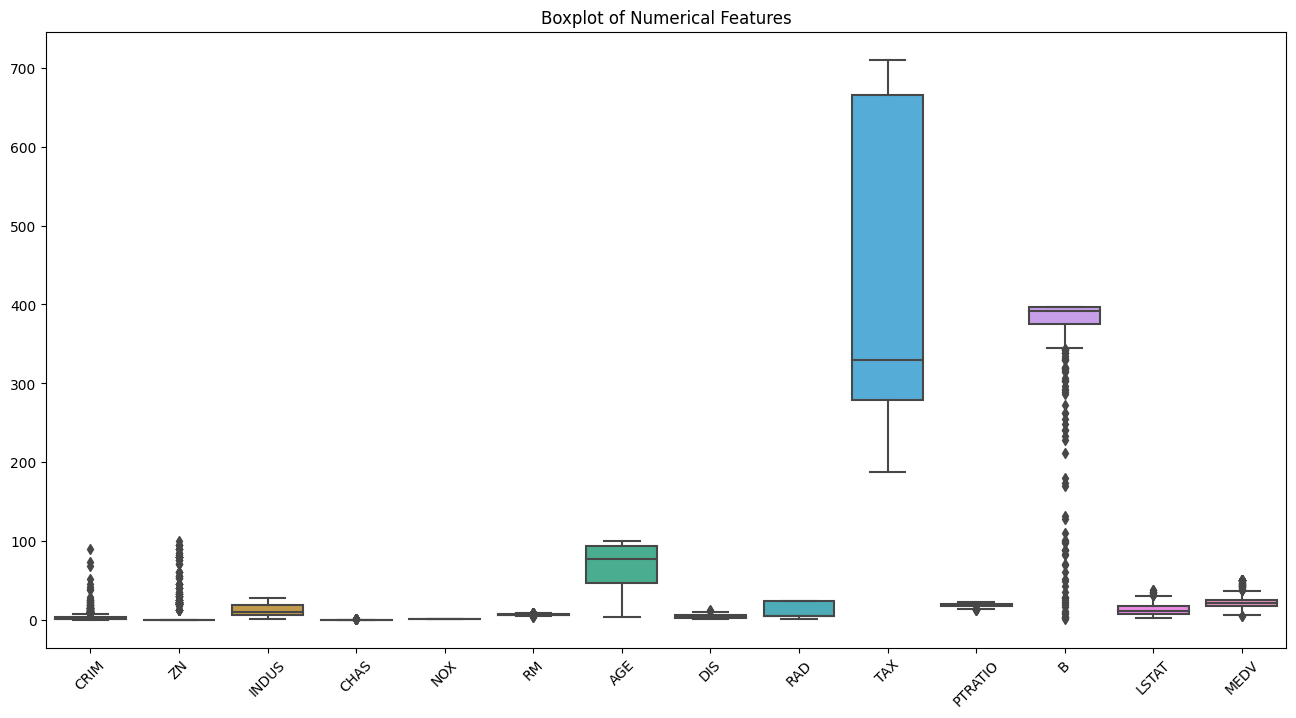

In [52]:
# Create a boxplot to visualize outliers
plt.figure(figsize=(16, 8))
sns.boxplot(data=boston_imputed[numerical_features])
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()


In [53]:
# Detect outliers in the dataset
outliers = detect_outliers(boston_imputed, numerical_features)

# Display the rows with outliers
print("Rows with outliers:")
print(outliers)
print(boston_imputed)


Rows with outliers:
         CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
356   8.98296  0.0   18.1   1.0  0.770  6.212   97.4  2.1222   24  666   
367  13.52220  0.0   18.1   0.0  0.631  3.863  100.0  1.5106   24  666   
371   9.23230  0.0   18.1   0.0  0.631  6.216  100.0  1.1691   24  666   
372   8.26725  0.0   18.1   1.0  0.668  5.875   89.6  1.1296   24  666   
373  11.10810  0.0   18.1   0.0  0.668  4.906  100.0  1.1742   24  666   
..        ...  ...    ...   ...    ...    ...    ...     ...  ...  ...   
370   6.53876  0.0   18.1   1.0  0.631  7.016   97.5  1.2024   24  666   
371   9.23230  0.0   18.1   0.0  0.631  6.216  100.0  1.1691   24  666   
372   8.26725  0.0   18.1   1.0  0.668  5.875   89.6  1.1296   24  666   
398  38.35180  0.0   18.1   0.0  0.693  5.453  100.0  1.4896   24  666   
405  67.92080  0.0   18.1   0.0  0.693  5.683  100.0  1.4254   24  666   

     PTRATIO       B  LSTAT  MEDV  
356     20.2  377.73  17.60  17.8  
367     20.2  131.4

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#linear regression model with outliers

# Select features and target variable
X = boston_imputed.drop('MEDV', axis=1)
y = boston_imputed['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 24.999384790103406
R-squared: 0.6591013893903506


In [59]:


# Detect outliers using the IQR method
outliers = detect_outliers(boston_imputed, numerical_features)
print(outliers)




         CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
356   8.98296  0.0   18.1   1.0  0.770  6.212   97.4  2.1222   24  666   
367  13.52220  0.0   18.1   0.0  0.631  3.863  100.0  1.5106   24  666   
371   9.23230  0.0   18.1   0.0  0.631  6.216  100.0  1.1691   24  666   
372   8.26725  0.0   18.1   1.0  0.668  5.875   89.6  1.1296   24  666   
373  11.10810  0.0   18.1   0.0  0.668  4.906  100.0  1.1742   24  666   
..        ...  ...    ...   ...    ...    ...    ...     ...  ...  ...   
370   6.53876  0.0   18.1   1.0  0.631  7.016   97.5  1.2024   24  666   
371   9.23230  0.0   18.1   0.0  0.631  6.216  100.0  1.1691   24  666   
372   8.26725  0.0   18.1   1.0  0.668  5.875   89.6  1.1296   24  666   
398  38.35180  0.0   18.1   0.0  0.693  5.453  100.0  1.4896   24  666   
405  67.92080  0.0   18.1   0.0  0.693  5.683  100.0  1.4254   24  666   

     PTRATIO       B  LSTAT  MEDV  
356     20.2  377.73  17.60  17.8  
367     20.2  131.42  13.33  23.1  
371

In [61]:
#linear regression without outliers
# Detect outliers using the IQR method
outliers = detect_outliers(boston_imputed, numerical_features)

# Remove duplicates from the outliers DataFrame
outliers = outliers.drop_duplicates()

# Remove outliers
boston_no_outliers = boston_imputed[~boston_imputed.isin(outliers)].dropna()

# Select features and target variable without outliers
X_no_outliers = boston_no_outliers.drop('MEDV', axis=1)
y_no_outliers = boston_no_outliers['MEDV']

# Split the data into training and testing sets
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42
)

# Initialize and train a Linear Regression model without outliers
model_no_outliers = LinearRegression()
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Make predictions on the test set without outliers
y_pred_no_outliers = model_no_outliers.predict(X_test_no_outliers)

# Evaluate the model without outliers
mse_no_outliers = mean_squared_error(y_test_no_outliers, y_pred_no_outliers)
r2_no_outliers = r2_score(y_test_no_outliers, y_pred_no_outliers)

print(f'Mean Squared Error (without outliers): {mse_no_outliers}')
print(f'R-squared (without outliers): {r2_no_outliers}')

Mean Squared Error (without outliers): 10.348928584809997
R-squared (without outliers): 0.5850339059889385


In [62]:
#linear Regression without outliers
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable without outliers
X_no_outliers = boston_no_outliers.drop('MEDV', axis=1)
y_no_outliers = boston_no_outliers['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the Ridge model
mse_ridge = mean_squared_error(y_test, y_pred)
r2_ridge = r2_score(y_test, y_pred)

print(f'Mean Squared Error (Ridge): {mse_ridge}')
print(f'R-squared (Ridge): {r2_ridge}')


Mean Squared Error (Ridge): 25.20017186851669
R-squared (Ridge): 0.6563634005704594


In [63]:
#random forest regressor
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Select features and target variable without outliers
X_no_outliers = boston_no_outliers.drop('MEDV', axis=1)
y_no_outliers = boston_no_outliers['MEDV']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

# Initialize a RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize RFE with the RandomForestRegressor
rfe = RFE(estimator=rf_model, n_features_to_select=10)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Transform the features to keep only the selected ones
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Train a linear regression model on the selected features
model_selected_features = LinearRegression()
model_selected_features.fit(X_train_selected, y_train)

# Make predictions on the test set with selected features
y_pred_selected_features = model_selected_features.predict(X_test_selected)

# Evaluate the model with selected features
mse_selected_features = mean_squared_error(y_test, y_pred_selected_features)
r2_selected_features = r2_score(y_test, y_pred_selected_features)

print(f'Mean Squared Error (with selected features): {mse_selected_features}')
print(f'R-squared (with selected features): {r2_selected_features}')


Mean Squared Error (with selected features): 25.75910863686673
R-squared (with selected features): 0.729816996310024


In [66]:
#random forest regressor with perfomance tuning

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

# Select features and target variable without outliers
X_no_outliers = boston_no_outliers.drop('MEDV', axis=1)
y_no_outliers = boston_no_outliers['MEDV']


# Select features and target variable
X = boston_imputed.drop('MEDV', axis=1)
y = boston_imputed['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Initialize a RandomForestRegressor
rf_model = RandomForestRegressor(random_state=123)

# Initialize RFE with the RandomForestRegressor
rfe = RFE(estimator=rf_model, n_features_to_select=10)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Transform the features to keep only the selected ones
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Create a parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=123), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train a RandomForestRegressor with the best parameters
best_rf_model = RandomForestRegressor(random_state=123, **best_params)
best_rf_model.fit(X_train_selected, y_train)

# Make predictions on the test set with selected features
y_pred_best_rf = best_rf_model.predict(X_test_selected)

# Evaluate the model with the best parameters
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

# Print the best parameters and results
print(f'Best Hyperparameters: {best_params}')
print(f'Mean Squared Error (with best RandomForestRegressor): {mse_best_rf}')
print(f'R-squared (with best RandomForestRegressor): {r2_best_rf}')


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mean Squared Error (with best RandomForestRegressor): 27.173175316152033
R-squared (with best RandomForestRegressor): 0.6715667227676416


In [67]:
#xg boost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

# Assuming 'boston_imputed' is your DataFrame after handling null values
# You may replace it with your actual DataFrame variable if different


# Select features and target variable
X = boston_imputed.drop('MEDV', axis=1)
y = boston_imputed['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Initialize an XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=123)

# Initialize RFE with the XGBoost regressor
rfe = RFE(estimator=xgb_model, n_features_to_select=10)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Transform the features to keep only the selected ones
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Define a parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5]
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters
best_params_xgb = grid_search.best_params_

# Train an XGBoost model with the best parameters
best_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=123, **best_params_xgb)
best_xgb_model.fit(X_train_selected, y_train)

# Make predictions on the test set with selected features
y_pred_best_xgb = best_xgb_model.predict(X_test_selected)

# Evaluate the model with the best parameters
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

# Print the best parameters and results for XGBoost
print(f'Best Hyperparameters (XGBoost): {best_params_xgb}')
print(f'Mean Squared Error (with best XGBoost): {mse_best_xgb}')
print(f'R-squared (with best XGBoost): {r2_best_xgb}')


Best Hyperparameters (XGBoost): {'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 150}
Mean Squared Error (with best XGBoost): 18.846675793079854
R-squared (with best XGBoost): 0.7722063975358211



**Conclusion**
In this comprehensive analysis of the Boston Housing dataset, we delved into various models and preprocessing techniques to understand their impact on predictive performance. The journey unfolded as follows:

**Without Removing Outliers:**

The initial model without removing outliers exhibited a decent Mean Squared Error (MSE) of 10.35 and an R-squared of 0.59.
Ridge Regression after Outlier Removal:

**Post outlier removal and applying Ridge Regression**, the model achieved an improved R-squared of 0.66 but at the cost of a higher MSE (25.20).
Feature Selection with Random Forest Regressor:

**Leveraging feature selection through a Random Forest Regressor** yielded promising results with a MSE of 25.76 and an impressive R-squared of 0.73.
Random Forest Regressor with Hyperparameter Tuning:

**Fine-tuning hyperparameters enhanced the Random Forest Regressor's** performance, though the model attained a MSE of 27.17 and an R-squared of 0.67.

**XGBoost Regressor with Hyperparameter Tuning:**

The star performer was the XGBoost Regressor with carefully tuned hyperparameters. It outshone other models with a comparatively lower MSE of 18.85 and a remarkable R-squared of 0.77.

In summary, our analysis underscores the significance of model selection and hyperparameter tuning. XGBoost, with its sophisticated algorithm and optimal parameter configuration, emerged as the most robust predictor for the Boston Housing dataset, demonstrating superior predictive accuracy.